<a href="https://colab.research.google.com/github/yiwenwangANU/Machine_Learning/blob/main/04_Transfer_Learning_Fine_tuning_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
!wget https://raw.githubusercontent.com/yiwenwangANU/MachineLearningTools/master/helperfunctions.py

from helperfunctions import unzip_data, walk_through_dir, plot_random_image, create_tensorboard_callback, plot_loss_curve
unzip_data("10_food_classes_10_percent.zip")

--2022-05-26 02:38:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 173.194.202.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   305MB/s    in 0.5s    

2022-05-26 02:38:49 (305 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]

--2022-05-26 02:38:50--  https://raw.githubusercontent.com/yiwenwangANU/MachineLearningTools/master/helperfunctions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent,

In [ ]:
walk_through_dir("10_food_classes_10_percent")

Current directory: 10_food_classes_10_percent, number of sub-directories: 2, number of files: 0
Current directory: 10_food_classes_10_percent/train, number of sub-directories: 10, number of files: 0
Current directory: 10_food_classes_10_percent/train/fried_rice, number of sub-directories: 0, number of files: 75
Current directory: 10_food_classes_10_percent/train/hamburger, number of sub-directories: 0, number of files: 75
Current directory: 10_food_classes_10_percent/train/pizza, number of sub-directories: 0, number of files: 75
Current directory: 10_food_classes_10_percent/train/sushi, number of sub-directories: 0, number of files: 75
Current directory: 10_food_classes_10_percent/train/steak, number of sub-directories: 0, number of files: 75
Current directory: 10_food_classes_10_percent/train/ramen, number of sub-directories: 0, number of files: 75
Current directory: 10_food_classes_10_percent/train/chicken_curry, number of sub-directories: 0, number of files: 75
Current directory: 10

In [ ]:
import tensorflow as tf

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

In [ ]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                            batch_size=BATCH_SIZE,
                                                                            label_mode='categorical',
                                                                            image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                batch_size=BATCH_SIZE,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
data_augmented = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2)
])

In [ ]:
checkpoint_path = "10_percent_model_checkpoints_weights/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         verbose=1)

In [ ]:
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
x = data_augmented(input_layer)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output_layer = tf.keras.layers.Dense(10, activation="softmax")(x)
model_2 = tf.keras.Model(input_layer, output_layer)

In [ ]:
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                              epochs=5,
                              validation_data=test_data,
                              steps_per_epoch=len(train_data_10_percent),
                              validation_steps=len(test_data),
                              callbacks=[create_tensorboard_callback("Transfer_Learning",
                                                                    "10_percent_augmented"),
                                        checkpoint_callback])

Saving TensorBoard log files to: Transfer_Learning/10_percent_augmented/20220526-023855
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0280 - accuracy: 0.2853
Epoch 1: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 20s 583ms/step - loss: 2.0280 - accuracy: 0.2853 - val_loss: 1.4975 - val_accuracy: 0.6496
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4104 - accuracy: 0.6667
Epoch 2: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 12s 494ms/step - loss: 1.4104 - accuracy: 0.6667 - val_loss: 1.0714 - val_accuracy: 0.7568
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1077 - accuracy: 0.7040
Epoch 3: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 12s 476ms/step - loss: 1.1077 - accuracy: 0.7040 - val_loss: 0.8696 - val_accuracy: 0.7948
Epo

In [ ]:
result_10_percent_data_aug = model_2.evaluate(test_data)
result_10_percent_data_aug

79/79 [==============================] - 7s 77ms/step - loss: 0.6994 - accuracy: 0.8172


[0.6994085311889648, 0.8172000050544739]

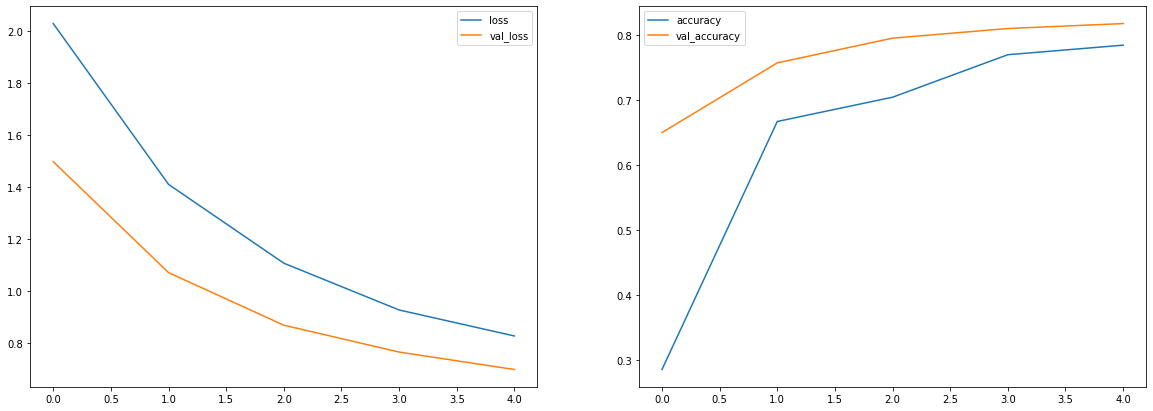

In [ ]:
plot_loss_curve(history_10_percent_data_aug)

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

In [ ]:
for layer in base_model.layers[-10:]:
  layer.trainable = True

for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

In [ ]:
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
initial_epochs = 5
fine_tune_epochs = initial_epochs + 5

history_10_percent_fine_tune = model_2.fit(train_data_10_percent,
                                          epochs=fine_tune_epochs,
                                          initial_epoch=history_10_percent_data_aug.epoch[-1],
                                          validation_data=test_data,
                                          steps_per_epoch=len(train_data_10_percent),
                                          validation_steps=len(test_data),
                                          callbacks=[create_tensorboard_callback("Transfer_Learning",
                                                                                 "10_percent_fine_tune"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: Transfer_Learning/10_percent_fine_tune/20220526-024018
Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.7620 - accuracy: 0.7933
Epoch 5: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 22s 521ms/step - loss: 0.7620 - accuracy: 0.7933 - val_loss: 0.6415 - val_accuracy: 0.8244
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.6816 - accuracy: 0.8227
Epoch 6: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 12s 493ms/step - loss: 0.6816 - accuracy: 0.8227 - val_loss: 0.6069 - val_accuracy: 0.8272
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.6130 - accuracy: 0.8253
Epoch 7: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 12s 507ms/step - loss: 0.6130 - accuracy: 0.8253 - val_loss: 0.5697 - val_accuracy: 0.8396


In [ ]:
result_10_percent_fine_tune = model_2.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.5251 - accuracy: 0.8436


In [ ]:
import matplotlib.pyplot as plt

def plot_fine_turn_loss(original_history, new_history, initial_epochs): 
  loss = original_history.history["loss"] + new_history.history["loss"]
  val_loss = original_history.history["val_loss"] + new_history.history["val_loss"]
  accuracy = original_history.history["accuracy"] + new_history.history["accuracy"]
  val_accuracy = original_history.history["val_accuracy"] + new_history.history["val_accuracy"]
  plt.figure(figsize=(10, 7))
  plt.subplot(2, 1, 1)
  plt.plot(loss, label="loss")
  plt.plot(val_loss, label="val_loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tune")
  plt.legend()
  plt.subplot(2, 1, 2)
  plt.plot(accuracy, label="accuracy")
  plt.plot(val_accuracy, label="val_accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tune")
  plt.legend()

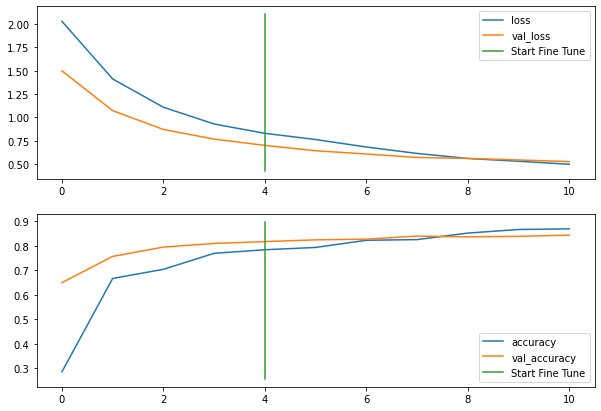

In [ ]:
plot_fine_turn_loss(history_10_percent_data_aug, history_10_percent_fine_tune, 5)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

unzip_data("10_food_classes_all_data.zip")

--2022-05-26 02:55:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 173.194.202.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   269MB/s    in 1.8s    

2022-05-26 02:55:14 (269 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
train_dir_all = "10_food_classes_all_data/train"
test_dir_all = "10_food_classes_all_data/test"

In [ ]:
train_data_all = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all,
                                                                     label_mode='categorical',
                                                                     image_size=IMG_SIZE)
test_data_all = tf.keras.preprocessing.image_dataset_from_directory(test_dir_all,
                                                                    label_mode='categorical',
                                                                    image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

data_augmented = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2)
])

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

In [ ]:
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
x = data_augmented(input_layer)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output_layer = tf.keras.layers.Dense(10, activation="softmax")(x)
model_4 = tf.keras.Model(input_layer, output_layer)

In [ ]:
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
initial_epochs=5

history_all_data_aug = model_4.fit(train_data_all,
                                   epochs=initial_epochs,
                                   validation_data=test_data_all,
                                   steps_per_epoch=len(train_data_all),
                                   validation_steps=int(0.25*len(test_data_all)),
                                   callbacks=[create_tensorboard_callback("Transfer_Learning",
                                                                          "all_augmented"),
                                              checkpoint_callback])

Saving TensorBoard log files to: Transfer_Learning/all_augmented/20220526-031243
Epoch 1/5
235/235 [==============================] - ETA: 0s - loss: 1.1009 - accuracy: 0.6776
Epoch 1: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 54s 204ms/step - loss: 1.1009 - accuracy: 0.6776 - val_loss: 0.4885 - val_accuracy: 0.8849
Epoch 2/5
235/235 [==============================] - ETA: 0s - loss: 0.7005 - accuracy: 0.7859
Epoch 2: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 45s 188ms/step - loss: 0.7005 - accuracy: 0.7859 - val_loss: 0.4384 - val_accuracy: 0.8651
Epoch 3/5
235/235 [==============================] - ETA: 0s - loss: 0.6178 - accuracy: 0.8045
Epoch 3: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 42s 177ms/step - loss: 0.6178 - accuracy: 0.8045 - val_loss: 0.3600 - val_accuracy: 0.891

In [ ]:
for layer in base_model.layers:
  layer.trainable=False

for layer in base_model.layers[-10:]:
  layer.trainable=True

for i, layer in enumerate(base_model.layers):
  print(1, layer.name, layer.trainable)

In [ ]:
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history_all_fine_tune = model_4.fit(train_data_all,
                                    epochs=initial_epochs+5,
                                    initial_epoch=history_all_data_aug.epoch[-1],
                                    validation_data=test_data_all,
                                    steps_per_epoch=len(train_data_all),
                                    validation_steps=int(0.25*len(test_data_all)),
                                    callbacks=[create_tensorboard_callback("Transfer_Learning",
                                                                           "all_fine_tune"),
                                               checkpoint_callback])

Saving TensorBoard log files to: Transfer_Learning/all_fine_tune/20220526-032559
Epoch 5/10
235/235 [==============================] - ETA: 0s - loss: 0.5113 - accuracy: 0.8447
Epoch 5: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 44s 162ms/step - loss: 0.5113 - accuracy: 0.8447 - val_loss: 0.3744 - val_accuracy: 0.8816
Epoch 6/10
235/235 [==============================] - ETA: 0s - loss: 0.5131 - accuracy: 0.8411
Epoch 6: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 35s 146ms/step - loss: 0.5131 - accuracy: 0.8411 - val_loss: 0.3763 - val_accuracy: 0.8816
Epoch 7/10
235/235 [==============================] - ETA: 0s - loss: 0.5106 - accuracy: 0.8401
Epoch 7: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 34s 143ms/step - loss: 0.5106 - accuracy: 0.8401 - val_loss: 0.3745 - val_accuracy: 0.

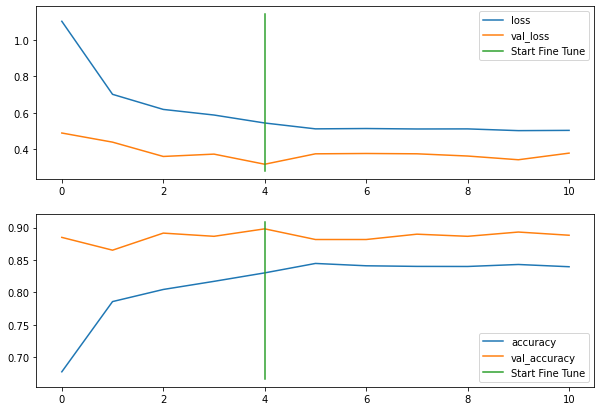

In [ ]:
plot_fine_turn_loss(history_all_data_aug, history_all_fine_tune, 5)